#Part 1: LSTM 

## Import libraries

In [ ]:
# Required to save models in HDF5 format
!pip install h5py

# Install and update required packages for Python 3.9
!sudo apt update
!sudo apt install python3.9

# Import required libraries for data analysis, visualization, 
# and machine learning
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from numpy import array
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

# The above libraries are used for various purposes in the code:
# pandas: for data manipulation and analysis
# pandas_datareader: for fetching data from Yahoo Finance
# matplotlib: for data visualization
# plotly: for interactive data visualization
# numpy: for numerical computing
# sklearn: for data preprocessing and evaluation
# tensorflow and keras: for building and training the LSTM model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 336 kB in 2s (142 kB/s)
Reading package lists... Done
Building dependency tree       
Reading s

## Data Collection

In [ ]:
# Import the YahooFinance API and datetime library

import yfinance as yf
from datetime import datetime 

# Define the stock symbol and start date for data collection
symbol= 'TSLA'
start_date = datetime(2018, 1, 1)

# Download data from YahooFinance API for the given stock symbol and start date
df = yf.download(symbol, start=start_date)


# Save the downloaded data to a CSV file
df.to_csv('TSLA.csv')

# Read the saved CSV file into a Pandas DataFrame for further analysis
df=pd.read_csv('TSLA.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# This code displays the first few rows of a pandas DataFrame 'df'
# It is used to check if the data has been loaded correctly and to understand 
# the structure of the data
# By default, it displays the first 5 rows of the DataFrame
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [ ]:
# Display the last 5 rows of the DataFrame to check the latest data
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1315,2023-03-24,191.649994,192.360001,187.149994,190.410004,190.410004,116312400
1316,2023-03-27,194.419998,197.389999,189.940002,191.809998,191.809998,120851600
1317,2023-03-28,192.000000,192.350006,185.429993,189.190002,189.190002,98654600
1318,2023-03-29,193.130005,195.289993,189.440002,193.880005,193.880005,123660000
1319,2023-03-30,195.580002,197.330002,194.419998,195.279999,195.279999,110012000


In [ ]:
# We select only the 'Date' and 'Close' columns from our dataframe
# and make a copy of it
df = df[['Date', 'Close']].copy()

# The 'Date' column is in the object type, so we convert it to a string
# and remove the last 14 digits,
# which represent the timestamp, to keep only the date
df['date'] = df['Date'].astype(str).str[:-14]
print(df)

            Date       Close date
0     2018-01-02   21.368668     
1     2018-01-03   21.150000     
2     2018-01-04   20.974667     
3     2018-01-05   21.105333     
4     2018-01-08   22.427334     
...          ...         ...  ...
1315  2023-03-24  190.410004     
1316  2023-03-27  191.809998     
1317  2023-03-28  189.190002     
1318  2023-03-29  193.880005     
1319  2023-03-30  195.279999     

[1320 rows x 3 columns]


In [ ]:
# The describe() function is used to view some basic statistical details 
# like count, mean, std dev, min, max, etc. of a dataframe.
# It provides a summary of the central tendency, dispersion and shape of 
# the distribution of a dataset.

df.describe()

,Close
count,1320.000000
mean,133.731431
std,115.613584
min,11.931333
25%,21.313500
50%,109.316666
75%,233.067501
max,409.970001


## Analysis of Year 2018







In [ ]:
# Convert 'Date' column to datetime format with year-month-day format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Filter data for year 2018 and store it in y_2018 variable
y_2018 = df.loc[(df['Date'] >= '2018-01-01')
                     & (df['Date'] < '2019-01-01')]

In [ ]:
y_2018

,Date,Close,date
0,2018-01-02,21.368668,
1,2018-01-03,21.150000,
2,2018-01-04,20.974667,
3,2018-01-05,21.105333,
4,2018-01-08,22.427334,
...,...,...,...
246,2018-12-24,19.692667,
247,2018-12-26,21.739332,
248,2018-12-27,21.075333,
249,2018-12-28,22.257999,


In [ ]:
# Group daily closing prices by month for the year 2018
monthly= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Close']].mean()

# Define the order of the months
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']

# Reindex the monthly dataframe to match the specified order             
monthly = monthly.reindex(order, axis=0)

# Display the monthly average closing prices for 2018
monthly

,Close
Date,
January,22.572222
February,22.385158
March,21.065555
April,19.318190
May,19.323485
June,22.373365
July,20.798317
August,22.080957
September,19.343193


In [ ]:
# Create an empty plotly figure
fig = go.Figure()

# Add a bar trace with monthly index as x and monthly 'Close' as y
fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly['Close'],
    name='Stock Close Price',
    marker_color='rgb(133, 65, 181)'
))

# Update the layout of the plot, rotate x-axis labels by -45 degrees and set a title
fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthly comparision of close prices - 2018')
# Display the plotly figure
fig.show()

## Analysis of Year 2019

In [ ]:
year_2019 = df.loc[(df['Date'] >= '2019-01-01')
                   & (df['Date'] <= '2020-1-1')]

In [ ]:
monthly= year_2019.groupby(year_2019['Date'].dt.strftime('%B'))[['Close']].mean()
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthly = monthly.reindex(order, axis=0)
monthly

,Close
Date,
January,21.232952
February,20.515228
March,18.517143
April,17.777048
May,14.647697
June,14.247767
July,16.158818
August,15.006849
September,15.817433


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly['Close'],
    name='Stock Close Price',
    marker_color='rgb(133, 65, 181)'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthly comparision of close prices - 2019')
fig.show()

## Analysis of Year 2020

In [ ]:
year_2020 = df.loc[(df['Date'] >= '2020-01-01')
                   & (df['Date'] <= '2021-01-01')]

In [ ]:
monthly= year_2020.groupby(year_2020['Date'].dt.strftime('%B'))[['Close']].mean()
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthly = monthly.reindex(order, axis=0)
monthly

,Close
Date,
January,35.243936
February,53.163122
March,37.273425
April,44.239905
May,53.295033
June,64.236152
July,97.342728
August,120.019905
September,137.831745


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly['Close'],
    name='Stock Close Price',
    marker_color='rgb(133, 65, 181)'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthly comparision of close prices - 2020')
fig.show()

## Analysis of Year 2021

In [ ]:
year_2021 = df.loc[(df['Date'] >= '2021-01-01')
                   & (df['Date'] <= '2022-01-01')]

In [ ]:
monthly= year_2021.groupby(year_2021['Date'].dt.strftime('%B'))[['Close']].mean()
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthly = monthly.reindex(order, axis=0)
monthly

,Close
Date,
January,276.258947
February,264.756491
March,218.934202
April,236.539365
May,205.584335
June,208.973183
July,219.711588
August,235.081062
September,251.317463


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly['Close'],
    name='Stock Close Price',
    marker_color='rgb(133, 65, 181)'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthly comparision of close prices - 2021')
fig.show()

## Analysis of Year 2022

In [ ]:
year_2022 = df.loc[(df['Date'] >= '2022-01-01')
                   & (df['Date'] <= '2023-01-01')]

In [ ]:
monthly= year_2022.groupby(year_2022['Date'].dt.strftime('%B'))[['Close']].mean()
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthly = monthly.reindex(order, axis=0)
monthly

,Close
Date,
January,336.722830
February,292.961577
March,304.793186
April,332.462503
May,255.223333
June,234.025873
July,251.394666
August,294.869857
September,288.734763


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly['Close'],
    name='Stock Close Price',
    marker_color='rgb(133, 65, 181)'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthly comparision of close prices - 2022')
fig.show()

## Analysis of Year 2023

In [ ]:
year_2023 = df.loc[(df['Date'] >= '2023-01-01')
                   & (df['Date'] <= '2023-12-31')]

In [ ]:
monthly= year_2023.groupby(year_2023['Date'].dt.strftime('%B'))[['Close']].mean()
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthly = monthly.reindex(order, axis=0)
monthly

,Close
Date,
January,134.195999
February,199.775264
March,187.661818
April,NaN
May,NaN
June,NaN
July,NaN
August,NaN
September,NaN


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly['Close'],
    name='Stock Close Price',
    marker_color='rgb(133, 65, 181)'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthly comparision of close prices -2023')
fig.show()

## Lag Plot of Time Series Data for Overall price data

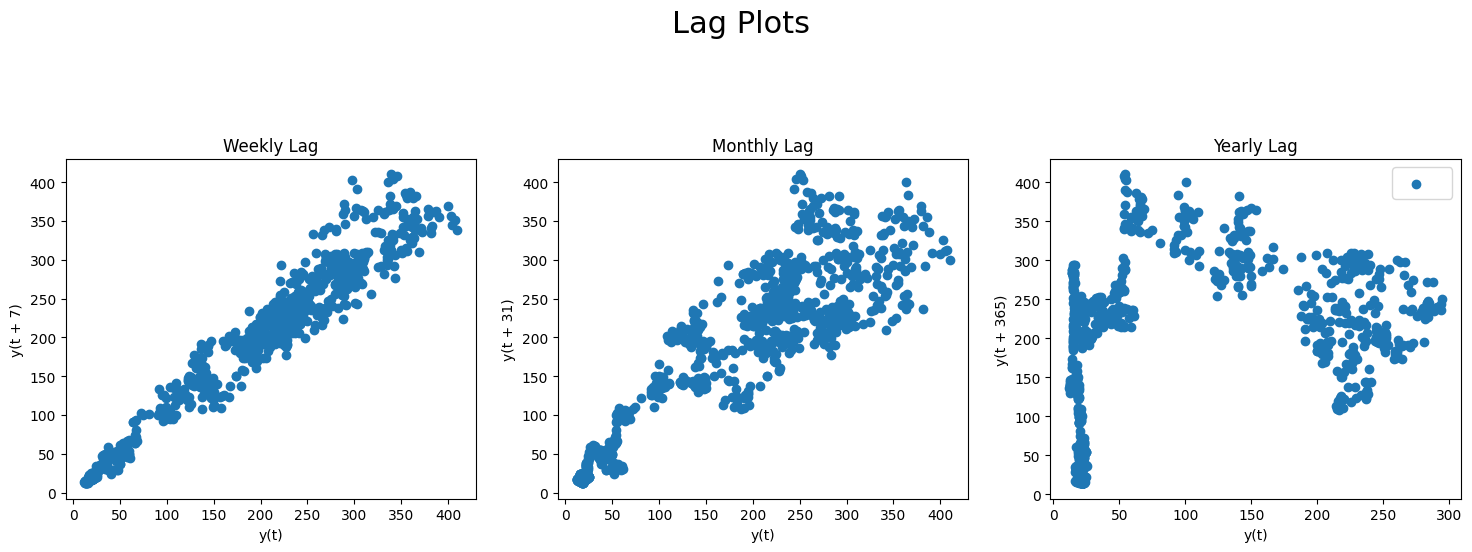

In [ ]:
# Set the figure size and title
plt.figure(figsize=(18,15))
plt.suptitle('Lag Plots', fontsize=22)

# Add subplots for weekly, monthly, and yearly lags
plt.subplot(3,3,1)
pd.plotting.lag_plot(df['Close'], lag=7) #Weekly Lag
plt.title('Weekly Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(df['Close'], lag=31) #Monthly Lag
plt.title('Monthly Lag')


plt.subplot(3,3,3)
pd.plotting.lag_plot(df['Close'], lag=365) #Yearly Lag
plt.title('Yearly Lag')

# Remove legend and show the plot
plt.legend([""], fontsize="large")
plt.show()

##Grouping the data by date with mean value of Close Prices

In [ ]:
# Group the data in the DataFrame by 'Date' column
group = df.groupby('Date')

# Calculate the mean of 'Close' column for each group
df_groupby_date = group['Close'].mean()

# The resulting Series object 'df_groupby_date' contains the average closing price
# for each date in the original DataFrame 'df'.

In [ ]:
df_groupby_date.head()

Date
2018-01-02    21.368668
2018-01-03    21.150000
2018-01-04    20.974667
2018-01-05    21.105333
2018-01-08    22.427334
Name: Close, dtype: float64

In [ ]:
len(df_groupby_date)

1320

## Splitting data

In [ ]:
# Define number of days for prediction
prediction_days = 100

# Set Train data to be all data except last prediction_days
df_train= df_groupby_date[:len(df_groupby_date)-prediction_days].values.reshape(-1,1)

# Set Test data to be last prediction_days
df_test= df_groupby_date[len(df_groupby_date)-prediction_days:].values.reshape(-1,1)

In [ ]:
df_train.shape

(1220, 1)

In [ ]:
df_test.shape

(100, 1)

## Scale Test and Training data

In [ ]:
# MinMaxScaler scales all the data in the range of 0 to 1
scaler_train = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0,1))
scaled_test = scaler_test.fit_transform(df_test)

# Scaled_train and Scaled_test are numpy arrays now.

In [ ]:
scaled_train

array([[0.02370959],
       [0.02316023],
       [0.02271974],
       ...,
       [0.54238116],
       [0.51012296],
       [0.51095203]])

In [ ]:
scaled_test

array([[0.93621628],
       [0.83832671],
       [0.78387035],
       [0.65470127],
       [0.77840585],
       [0.82786882],
       [0.78057276],
       [0.81326544],
       [0.74260406],
       [0.70727336],
       [0.67919728],
       [0.56312411],
       [0.58234408],
       [0.707556  ],
       [0.70435272],
       [0.70491798],
       [0.68522704],
       [0.81590346],
       [0.81590346],
       [0.81741093],
       [0.70048986],
       [0.67571136],
       [0.62125486],
       [0.61560203],
       [0.66845675],
       [0.56265315],
       [0.49792722],
       [0.45882798],
       [0.46702465],
       [0.39692853],
       [0.39353678],
       [0.27981913],
       [0.27765222],
       [0.16252119],
       [0.14179388],
       [0.00942152],
       [0.0434332 ],
       [0.12926324],
       [0.14207651],
       [0.        ],
       [0.05219522],
       [0.02110418],
       [0.04673072],
       [0.1099491 ],
       [0.10128132],
       [0.14245338],
       [0.14565666],
       [0.134

In [ ]:
# Define a function to generate datasets for LSTM modeling
def dataset_generator_lstm(dataset, look_back=30):
    # Initialize empty lists for input and output data
    dataX, dataY = [], []
    
    # Iterate through the dataset up to (length - look_back) index
    for i in range(len(dataset) - look_back):
        # Select the window of look_back size as input
        window_size_x = dataset[i:(i + look_back), 0]
        
        # Select the next value as output
        dataY.append(dataset[i + look_back, 0])
        
        # Append the input window to the dataX list
        dataX.append(window_size_x)
    
    # Convert dataX and dataY into numpy arrays and return
    return np.array(dataX), np.array(dataY)

# Generate training datasets using the dataset_generator_lstm function
trainX, trainY = dataset_generator_lstm(scaled_train)

# Generate testing datasets using the dataset_generator_lstm function
testX, testY = dataset_generator_lstm(scaled_test)


In [ ]:
# printing train and test datasets
print("trainX: ", trainX)
print("\ntrainY: ", trainY)
print("\ntestX: ", testX)
print("\ntestY: ", testY)

trainX:  [[0.02370959 0.02316023 0.02271974 ... 0.02201629 0.02290565 0.02423383]
 [0.02316023 0.02271974 0.02304801 ... 0.02290565 0.02423383 0.02400772]
 [0.02271974 0.02304801 0.0263693  ... 0.02423383 0.02400772 0.02597738]
 ...
 [0.74565288 0.72573013 0.69505474 ... 0.5355225  0.54413978 0.54167768]
 [0.72573013 0.69505474 0.66174137 ... 0.54413978 0.54167768 0.54238116]
 [0.69505474 0.66174137 0.66344981 ... 0.54167768 0.54238116 0.51012296]]

trainY:  [0.02400772 0.02597738 0.02621521 ... 0.54238116 0.51012296 0.51095203]

testX:  [[0.93621628 0.83832671 0.78387035 ... 0.45882798 0.46702465 0.39692853]
 [0.83832671 0.78387035 0.65470127 ... 0.46702465 0.39692853 0.39353678]
 [0.78387035 0.65470127 0.77840585 ... 0.39692853 0.39353678 0.27981913]
 ...
 [0.81533819 0.95298657 1.         ... 0.79253813 0.77548521 0.78867527]
 [0.95298657 1.         0.88505736 ... 0.77548521 0.78867527 0.76399094]
 [1.         0.88505736 0.94413032 ... 0.78867527 0.76399094 0.80817789]]

testY:  [0.

In [ ]:
# Print the shape of each dataset to check the number of rows and columns

print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("\ntestX: ", testX.shape)
print("testY: ", testY.shape)

trainX:  (1190, 30)
trainY:  (1190,)

testX:  (70, 30)
testY:  (70,)


In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)

Shape of trainX:  (1190, 30, 1)
Shape of testX:  (70, 30, 1)


In [ ]:
# Define the model architecture
model = Sequential()

# Adding the first LSTM layer and some Dropout regularization

model.add(LSTM(units = 128, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))

model.add(Dropout(0.2))

# Adding second LSTM layer and some Dropout regularization
model.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))

# Adding a dense output layer
model.add(Dense(units = 1))

# Printing the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30, 128)           66560     
                                                                 
 dropout_8 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Importing necessary callbacks from Keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#Compiling the LSTM
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

# Define callbacks to have more control over the training process. These include:
# stopping training when a certain accuracy/loss score is reached
# saving the model as a checkpoint after each successful epoch
# adjusting the learning rates over time
# restoring the weights with the best loss score
# The ModelCheckpoint callback saves the model's weights in a file specified 
# in filepath argument.
# The EarlyStopping callback stops training when there is no improvement 
# in the validation loss after a certain number of epochs specified in the patience argument.

checkpoint_path = '/Users/el/Downloads/project_model_final.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

earlystopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

callbacks = [checkpoint, earlystopping]

# Fit the model to the training data, and validate it on the test data.
# Use the callbacks to save the best model weights and stop training early if needed.

history = model.fit(trainX, trainY, batch_size = 32, epochs = 250, verbose=1, shuffle=False, validation_data=(testX, testY), callbacks=callbacks)

Epoch 1/250
37/38 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.0017
Epoch 1: val_loss improved from inf to 0.04921, saving model to /Users/el/Downloads/project_model_final.hdf5
38/38 [==============================] - 8s 96ms/step - loss: 0.0096 - accuracy: 0.0017 - val_loss: 0.0492 - val_accuracy: 0.0286
Epoch 2/250
38/38 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.0017
Epoch 2: val_loss did not improve from 0.04921
38/38 [==============================] - 3s 87ms/step - loss: 0.0242 - accuracy: 0.0017 - val_loss: 0.0597 - val_accuracy: 0.0286
Epoch 3/250
37/38 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.0017
Epoch 3: val_loss improved from 0.04921 to 0.04239, saving model to /Users/el/Downloads/project_model_final.hdf5
38/38 [==============================] - 6s 151ms/step - loss: 0.0159 - accuracy: 0.0017 - val_loss: 0.0424 - val_accuracy: 0.0286
Epoch 4/250
38/38 [==============================] - ET

## Training Loss and Testing Loss

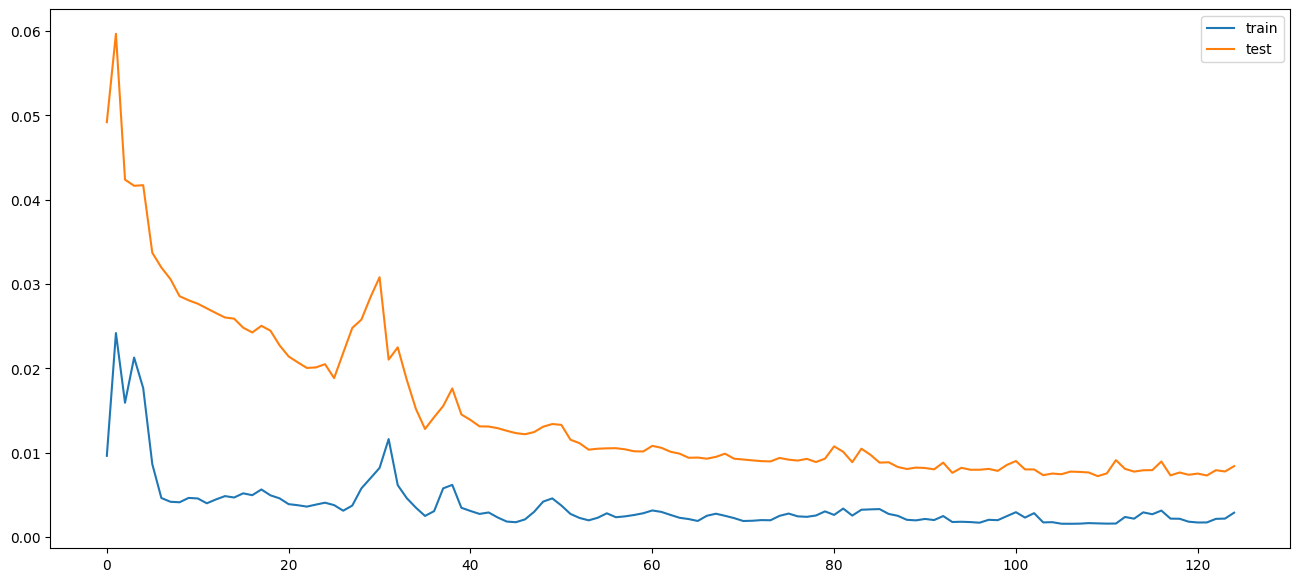

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Training Accuracy and Testing Accuracy

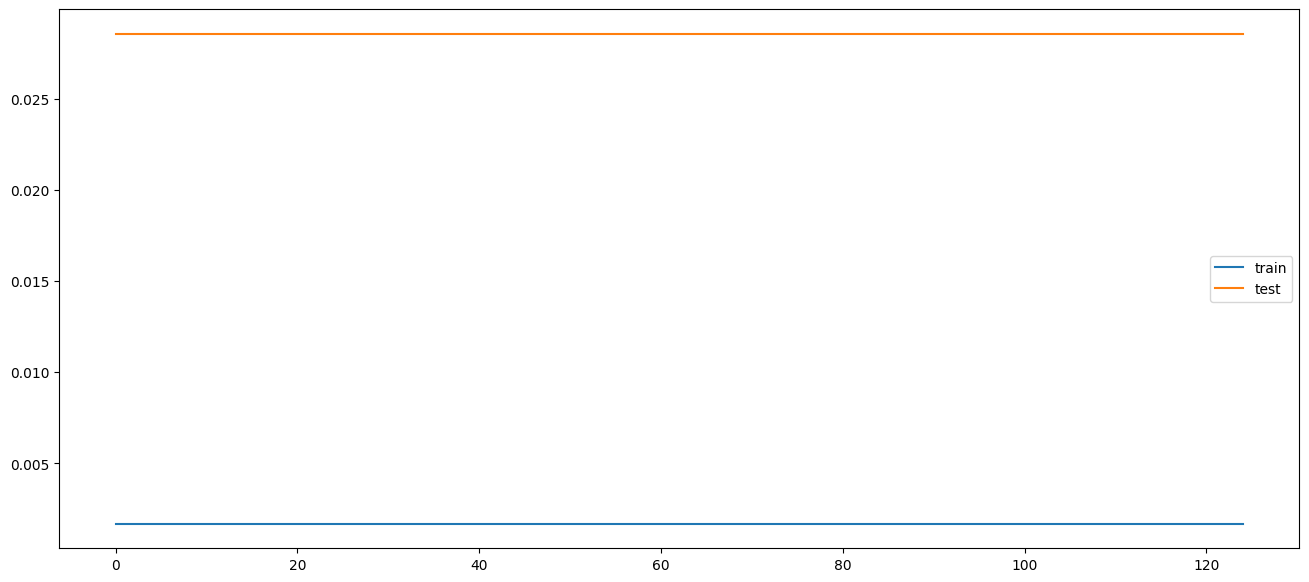

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(history.history['accuracy'], label='train')

plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# LSTM Predictions using testX and plotting line graph against actual testY

In [ ]:
# Transformation to original form and making predictions
from tensorflow.keras.models import load_model

# loading the saved model from the checkpoint path
model_from_saved_checkpoint = load_model(checkpoint_path)

# making predictions on the test data using the loaded model
predicted_test_data = model_from_saved_checkpoint.predict(testX)

# transforming the predicted data back to its original scale
predicted_test_data = scaler_test.inverse_transform(predicted_test_data.reshape(-1,1))

# transforming the actual test data back to its original scale
test_actual = scaler_test.inverse_transform(testY.reshape(-1,1))


3/3 [==============================] - 1s 17ms/step


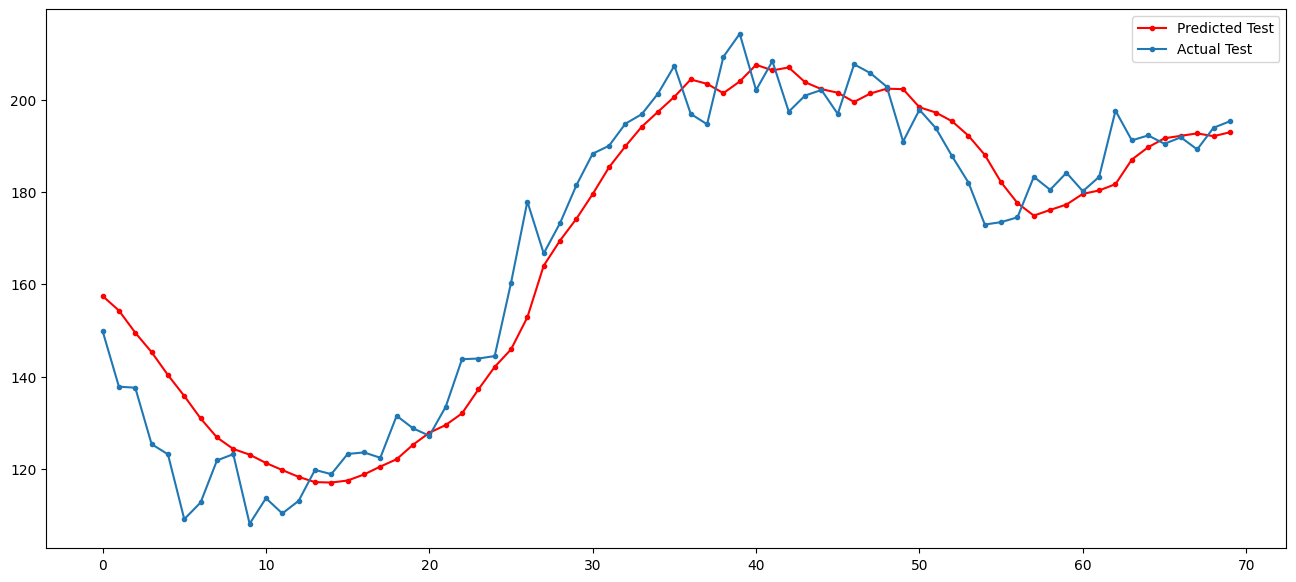

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_test_data, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')
plt.legend()
plt.show()

# LSTM Predictions using trainX and plotting line graph against actual trainY

In [ ]:
# Transformation to original form and making predictions

predicted_train_data = model_from_saved_checkpoint.predict(trainX)

predicted_train_data = scaler_train.inverse_transform(predicted_train_data.reshape(-1,1))

train_actual = scaler_train.inverse_transform(trainY.reshape(-1,1))

38/38 [==============================] - 1s 37ms/step


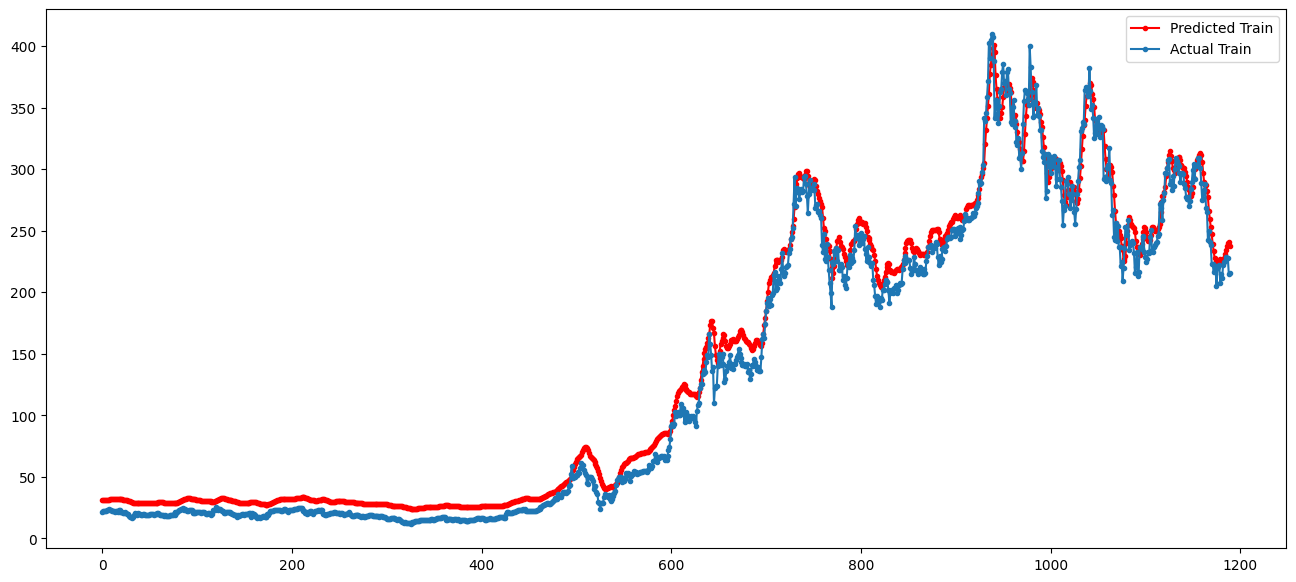

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_train_data, 'r', marker='.', label='Predicted Train')

plt.plot(train_actual, marker='.', label='Actual Train')
plt.legend()
plt.show()

# Calculating Root Mean Squared Error

Root Mean Squared Error (RMSE) is a commonly used metric to evaluate the performance of a regression model in Python. It measures the difference between the predicted values and actual values in a dataset, by taking the square root of the average of the squared differences. RMSE is a popular evaluation metric because it gives a more accurate and meaningful estimate of the model's error compared to the mean absolute error. RMSE is calculated as:

RMSE = sqrt(mean_squared_error(y_true, y_pred))

where y_true is the array of actual values and y_pred is the array of predicted values.

In [ ]:
rmse_lstm_test = math.sqrt(mean_squared_error(test_actual, predicted_test_data))

print('Test RMSE: %.3f' %rmse_lstm_test)

Test RMSE: 9.029


In [ ]:
rmse_lstm_train = math.sqrt(mean_squared_error(train_actual, predicted_train_data))

print('Train RMSE: %.3f' %rmse_lstm_train)

Train RMSE: 13.645


# Prediction of future 30 days price against actual testY

In [ ]:
testX

array([[[0.93621628],
        [0.83832671],
        [0.78387035],
        ...,
        [0.45882798],
        [0.46702465],
        [0.39692853]],

       [[0.83832671],
        [0.78387035],
        [0.65470127],
        ...,
        [0.46702465],
        [0.39692853],
        [0.39353678]],

       [[0.78387035],
        [0.65470127],
        [0.77840585],
        ...,
        [0.39692853],
        [0.39353678],
        [0.27981913]],

       ...,

       [[0.81533819],
        [0.95298657],
        [1.        ],
        ...,
        [0.79253813],
        [0.77548521],
        [0.78867527]],

       [[0.95298657],
        [1.        ],
        [0.88505736],
        ...,
        [0.77548521],
        [0.78867527],
        [0.76399094]],

       [[1.        ],
        [0.88505736],
        [0.94413032],
        ...,
        [0.78867527],
        [0.76399094],
        [0.80817789]]])

In [ ]:
testX.shape

(70, 30, 1)

In [ ]:
lookback_period = 30

testX_last_30_days = testX[testX.shape[0] - lookback_period : ]
testX_last_30_days.shape

(30, 30, 1)

In [ ]:
testX_last_30_days

array([[[0.05219522],
        [0.02110418],
        [0.04673072],
        [0.1099491 ],
        [0.10128132],
        [0.14245338],
        [0.14565666],
        [0.13472774],
        [0.22036938],
        [0.194837  ],
        [0.17966835],
        [0.23855284],
        [0.33587714],
        [0.33719614],
        [0.3422837 ],
        [0.49152066],
        [0.65762192],
        [0.55172415],
        [0.61352929],
        [0.69069154],
        [0.75532316],
        [0.77143388],
        [0.81646872],
        [0.83578286],
        [0.87799123],
        [0.93480311],
        [0.8365366 ],
        [0.81533819],
        [0.95298657],
        [1.        ]],

       [[0.02110418],
        [0.04673072],
        [0.1099491 ],
        [0.10128132],
        [0.14245338],
        [0.14565666],
        [0.13472774],
        [0.22036938],
        [0.194837  ],
        [0.17966835],
        [0.23855284],
        [0.33587714],
        [0.33719614],
        [0.3422837 ],
        [0.49152066],
        

In [ ]:
predicted_30_days_forecast_price_test_x = []

# loop through the next 30 days and make predictions using the saved model
for i in range(30):
    predicted_forecast_price_test_x = model_from_saved_checkpoint.predict(testX_last_30_days[i:i+1])
    
  # inverse scaling to get the actual forecasted price
predicted_forecast_price_test_x = scaler_test.inverse_transform(predicted_forecast_price_test_x.reshape(-1,1))
# append each predicted price to the list
predicted_30_days_forecast_price_test_x.append(predicted_forecast_price_test_x)

# print the array of predicted prices for the next 30 days  
print("Forecast for the next 30 Days Beyond the actual trading days ", np.array(predicted_30_days_forecast_price_test_x))

1/1 [==============================] - 0s 34ms/step
Forecast for the next 30 Days Beyond the actual trading days  [[[207.51363]]

 [[206.31682]]

 [[206.94255]]

 [[203.74907]]

 [[202.24786]]

 [[201.47787]]

 [[199.47302]]

 [[201.31018]]

 [[202.3488 ]]

 [[202.24211]]

 [[198.32718]]

 [[197.18272]]

 [[195.28705]]

 [[192.15086]]

 [[187.99825]]

 [[182.06761]]

 [[177.5643 ]]

 [[174.8533 ]]

 [[176.08037]]

 [[177.24963]]

 [[179.56139]]

 [[180.30225]]

 [[181.66591]]

 [[186.9881 ]]

 [[189.66661]]

 [[191.6027 ]]

 [[192.14105]]

 [[192.66075]]

 [[192.05475]]

 [[192.90402]]]


In [ ]:
predicted_30_days_forecast_price_test_x = np.array(predicted_30_days_forecast_price_test_x)
predicted_30_days_forecast_price_test_x.shape

(30, 1, 1)

In [ ]:
predicted_30_days_forecast_price_test_x

array([[[207.51363]],

       [[206.31682]],

       [[206.94255]],

       [[203.74907]],

       [[202.24786]],

       [[201.47787]],

       [[199.47302]],

       [[201.31018]],

       [[202.3488 ]],

       [[202.24211]],

       [[198.32718]],

       [[197.18272]],

       [[195.28705]],

       [[192.15086]],

       [[187.99825]],

       [[182.06761]],

       [[177.5643 ]],

       [[174.8533 ]],

       [[176.08037]],

       [[177.24963]],

       [[179.56139]],

       [[180.30225]],

       [[181.66591]],

       [[186.9881 ]],

       [[189.66661]],

       [[191.6027 ]],

       [[192.14105]],

       [[192.66075]],

       [[192.05475]],

       [[192.90402]]], dtype=float32)

In [ ]:
predicted_30_days_forecast_price_test_x=predicted_30_days_forecast_price_test_x.flatten()

predicted_30_days_forecast_price_test_x

array([207.51363, 206.31682, 206.94255, 203.74907, 202.24786, 201.47787,
       199.47302, 201.31018, 202.3488 , 202.24211, 198.32718, 197.18272,
       195.28705, 192.15086, 187.99825, 182.06761, 177.5643 , 174.8533 ,
       176.08037, 177.24963, 179.56139, 180.30225, 181.66591, 186.9881 ,
       189.66661, 191.6027 , 192.14105, 192.66075, 192.05475, 192.90402],
      dtype=float32)

In [ ]:
predicted_30_days_forecast_price_test_x.shape

(30,)

In [ ]:
predicted_test_data.shape

(70, 1)

In [ ]:
predicted_test_data=predicted_test_data.flatten()

predicted_test_data

array([157.44379 , 154.28743 , 149.49097 , 145.28226 , 140.31947 ,
       135.7832  , 130.92253 , 126.807526, 124.30284 , 123.076515,
       121.268875, 119.73479 , 118.256516, 117.12542 , 117.03383 ,
       117.47024 , 118.778435, 120.49013 , 122.08496 , 125.213104,
       127.81113 , 129.4887  , 132.01021 , 137.18896 , 142.08167 ,
       145.8697  , 152.82959 , 163.99922 , 169.451   , 174.15877 ,
       179.52414 , 185.32059 , 189.87141 , 194.09389 , 197.35901 ,
       200.59059 , 204.34529 , 203.3986  , 201.37688 , 203.91162 ,
       207.51363 , 206.31682 , 206.94254 , 203.74907 , 202.24786 ,
       201.47787 , 199.47304 , 201.31018 , 202.34882 , 202.24213 ,
       198.32718 , 197.18272 , 195.28703 , 192.15085 , 187.99823 ,
       182.06761 , 177.56432 , 174.8533  , 176.08037 , 177.24963 ,
       179.56139 , 180.30225 , 181.66591 , 186.9881  , 189.66661 ,
       191.6027  , 192.14107 , 192.66078 , 192.05476 , 192.90402 ],
      dtype=float32)

In [ ]:
predicted_30_days_forecast_prices_final = np.concatenate((predicted_test_data, predicted_30_days_forecast_price_test_x))
                                                         
predicted_30_days_forecast_prices_final

array([157.44379 , 154.28743 , 149.49097 , 145.28226 , 140.31947 ,
       135.7832  , 130.92253 , 126.807526, 124.30284 , 123.076515,
       121.268875, 119.73479 , 118.256516, 117.12542 , 117.03383 ,
       117.47024 , 118.778435, 120.49013 , 122.08496 , 125.213104,
       127.81113 , 129.4887  , 132.01021 , 137.18896 , 142.08167 ,
       145.8697  , 152.82959 , 163.99922 , 169.451   , 174.15877 ,
       179.52414 , 185.32059 , 189.87141 , 194.09389 , 197.35901 ,
       200.59059 , 204.34529 , 203.3986  , 201.37688 , 203.91162 ,
       207.51363 , 206.31682 , 206.94254 , 203.74907 , 202.24786 ,
       201.47787 , 199.47304 , 201.31018 , 202.34882 , 202.24213 ,
       198.32718 , 197.18272 , 195.28703 , 192.15085 , 187.99823 ,
       182.06761 , 177.56432 , 174.8533  , 176.08037 , 177.24963 ,
       179.56139 , 180.30225 , 181.66591 , 186.9881  , 189.66661 ,
       191.6027  , 192.14107 , 192.66078 , 192.05476 , 192.90402 ,
       207.51363 , 206.31682 , 206.94255 , 203.74907 , 202.247

In [ ]:
predicted_30_days_forecast_prices_final.shape

(100,)

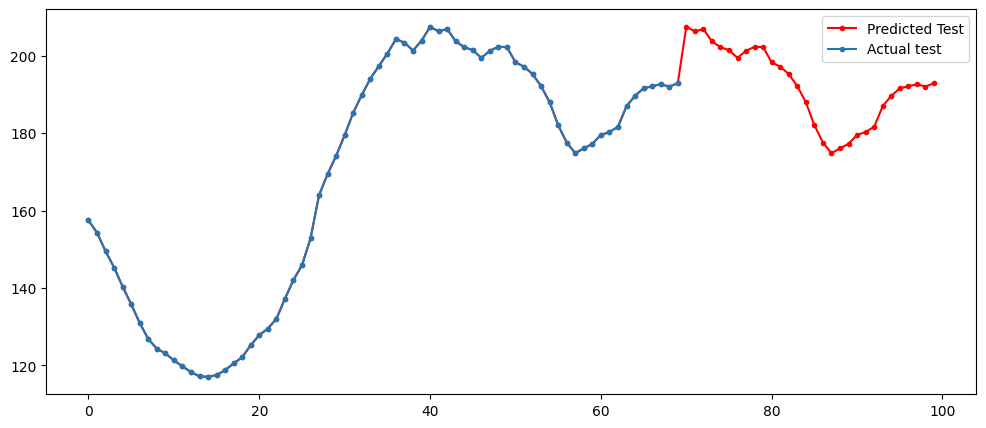

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(predicted_30_days_forecast_prices_final, 'r', marker='.', label='Predicted Test')

plt.plot(predicted_test_data, marker='.', label='Actual test')

plt.legend()
plt.show()

predicted_30_days_forecast_price_test_x

In [ ]:
forecast_30_days_prediction_values = predicted_30_days_forecast_prices_final[-30:]

In [ ]:
forecast_30_days_prediction_values

array([207.51363, 206.31682, 206.94255, 203.74907, 202.24786, 201.47787,
       199.47302, 201.31018, 202.3488 , 202.24211, 198.32718, 197.18272,
       195.28705, 192.15086, 187.99825, 182.06761, 177.5643 , 174.8533 ,
       176.08037, 177.24963, 179.56139, 180.30225, 181.66591, 186.9881 ,
       189.66661, 191.6027 , 192.14105, 192.66075, 192.05475, 192.90402],
      dtype=float32)

In [ ]:
test_30_days_values = test_actual[-30:]

In [ ]:
test_30_days_values

array([[202.03999329],
       [208.30999756],
       [197.36999512],
       [200.86000061],
       [202.07000732],
       [196.88000488],
       [207.63000488],
       [205.71000671],
       [202.77000427],
       [190.8999939 ],
       [197.78999329],
       [193.80999756],
       [187.71000671],
       [182.        ],
       [172.91999817],
       [173.44000244],
       [174.47999573],
       [183.25999451],
       [180.44999695],
       [184.13000488],
       [180.13000488],
       [183.25      ],
       [197.58000183],
       [191.1499939 ],
       [192.22000122],
       [190.41000366],
       [191.80999756],
       [189.19000244],
       [193.88000488],
       [195.27999878]])

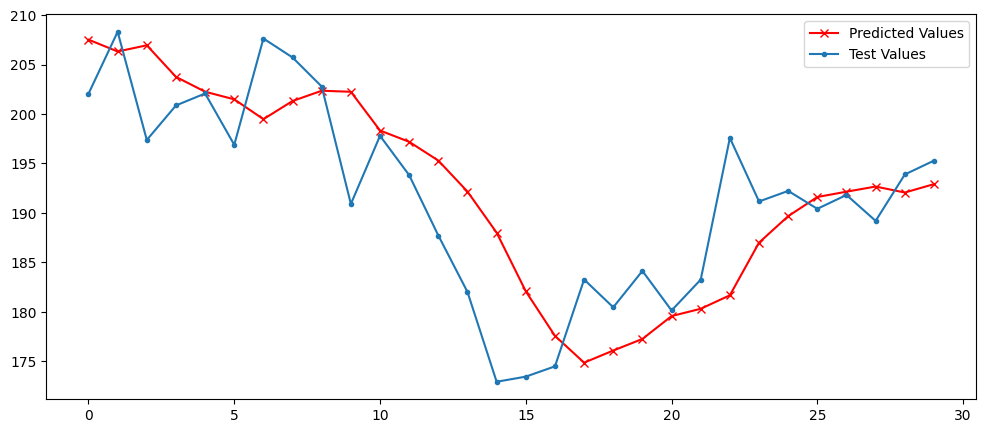

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(forecast_30_days_prediction_values, 'r', marker='x', label='Predicted Values')

plt.plot(test_30_days_values, marker='.', label='Test Values')

plt.legend()
plt.show()

In [ ]:
import datetime as helloworld
from datetime import timedelta
from datetime import date

dates = []
current_date=helloworld.date.today()
d = current_date-timedelta(days=29)
while d <= current_date:
    dates.append(helloworld.datetime.strftime(d,'%Y-%m-%d'))
    d += helloworld.timedelta(days=1)

print(len(dates))

30


In [ ]:
dates

['2023-03-02',
 '2023-03-03',
 '2023-03-04',
 '2023-03-05',
 '2023-03-06',
 '2023-03-07',
 '2023-03-08',
 '2023-03-09',
 '2023-03-10',
 '2023-03-11',
 '2023-03-12',
 '2023-03-13',
 '2023-03-14',
 '2023-03-15',
 '2023-03-16',
 '2023-03-17',
 '2023-03-18',
 '2023-03-19',
 '2023-03-20',
 '2023-03-21',
 '2023-03-22',
 '2023-03-23',
 '2023-03-24',
 '2023-03-25',
 '2023-03-26',
 '2023-03-27',
 '2023-03-28',
 '2023-03-29',
 '2023-03-30',
 '2023-03-31']

In [ ]:
predictions_list = pd.DataFrame(np.column_stack([dates, forecast_30_days_prediction_values, test_30_days_values]), 
                               columns=['Date', 'Predicted 30 Days Prices', 'Test 30 Days Prices'])
predictions_list

,Date,Predicted 30 Days Prices,Test 30 Days Prices
0,2023-03-02,207.51363,202.0399932861328
1,2023-03-03,206.31682,208.30999755859372
2,2023-03-04,206.94255,197.3699951171875
3,2023-03-05,203.74907,200.8600006103516
4,2023-03-06,202.24786,202.07000732421875
5,2023-03-07,201.47787,196.8800048828125
6,2023-03-08,199.47302,207.6300048828125
7,2023-03-09,201.31018,205.7100067138672
8,2023-03-10,202.3488,202.7700042724609
9,2023-03-11,202.24211,190.8999938964844


## Predicting next 30 days

In [ ]:
len(predicted_test_data)

70

In [ ]:
predicted_test_data = np.array(predicted_test_data)
predicted_test_data.shape

(70,)

In [ ]:
predicted_test_data = predicted_test_data.flatten()
predicted_test_data

array([157.44379 , 154.28743 , 149.49097 , 145.28226 , 140.31947 ,
       135.7832  , 130.92253 , 126.807526, 124.30284 , 123.076515,
       121.268875, 119.73479 , 118.256516, 117.12542 , 117.03383 ,
       117.47024 , 118.778435, 120.49013 , 122.08496 , 125.213104,
       127.81113 , 129.4887  , 132.01021 , 137.18896 , 142.08167 ,
       145.8697  , 152.82959 , 163.99922 , 169.451   , 174.15877 ,
       179.52414 , 185.32059 , 189.87141 , 194.09389 , 197.35901 ,
       200.59059 , 204.34529 , 203.3986  , 201.37688 , 203.91162 ,
       207.51363 , 206.31682 , 206.94254 , 203.74907 , 202.24786 ,
       201.47787 , 199.47304 , 201.31018 , 202.34882 , 202.24213 ,
       198.32718 , 197.18272 , 195.28703 , 192.15085 , 187.99823 ,
       182.06761 , 177.56432 , 174.8533  , 176.08037 , 177.24963 ,
       179.56139 , 180.30225 , 181.66591 , 186.9881  , 189.66661 ,
       191.6027  , 192.14107 , 192.66078 , 192.05476 , 192.90402 ],
      dtype=float32)

In [ ]:
x_input =predicted_test_data[-30:].reshape(1,-1)
x_input.shape

(1, 30)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[207.5136260986328,
 206.3168182373047,
 206.94253540039062,
 203.7490692138672,
 202.24786376953125,
 201.47787475585938,
 199.47303771972656,
 201.3101806640625,
 202.34881591796875,
 202.24212646484375,
 198.32717895507812,
 197.18272399902344,
 195.2870330810547,
 192.15084838867188,
 187.99822998046875,
 182.06761169433594,
 177.56431579589844,
 174.85330200195312,
 176.0803680419922,
 177.2496337890625,
 179.56138610839844,
 180.30224609375,
 181.66590881347656,
 186.98809814453125,
 189.66661071777344,
 191.6027069091797,
 192.1410675048828,
 192.66078186035156,
 192.0547637939453,
 192.90402221679688]

In [ ]:
len(temp_input)

30

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

output = []
n_steps= 30
i = 0

# Define the scaler object used for normalization
scaler = MinMaxScaler()

# Reshape temp_input to have a single feature
temp_input = array(temp_input).reshape(-1, 1)

# Fit the scaler object to your data
scaler.fit(temp_input)

while i < 30:
    if len(temp_input) > 30:
        x_input = array(temp_input[1:])
        x_input = x_input.reshape(-1, 1)  # Reshape to have a single feature
        x_input = scaler.transform(x_input)  # Apply scaling to the input
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        yhat = scaler.inverse_transform(yhat)  # Apply inverse scaling to the output
        temp_input = np.append(temp_input, yhat[0])
        temp_input = temp_input[1:]
        output.extend(yhat.tolist())
        i += 1
    else:
        x_input = temp_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        yhat = scaler.inverse_transform(yhat)  # Apply inverse scaling to the output
        temp_input = np.append(temp_input, yhat[0])
        output.extend(yhat.tolist())
        i += 1

print(output)


[[194.76345825195312], [194.70152282714844], [195.4808349609375], [196.20040893554688], [196.88128662109375], [197.53160095214844], [198.14974975585938], [198.73031616210938], [199.2700958251953], [199.7666015625], [200.2182159423828], [200.6237030029297], [200.98341369628906], [201.2982635498047], [201.56988525390625], [201.80047607421875], [201.992431640625], [202.14857482910156], [202.27110290527344], [202.363037109375], [202.42752075195312], [202.46669006347656], [202.48362731933594], [202.48098754882812], [202.46035766601562], [202.42442321777344], [202.3762664794922], [202.31768798828125], [202.251220703125], [202.17713928222656]]


In [ ]:
predictions = np.array(output)
predictions.shape


(30, 1)

In [ ]:
prediction= predictions.flatten()
prediction

array([194.76345825, 194.70152283, 195.48083496, 196.20040894,
       196.88128662, 197.53160095, 198.14974976, 198.73031616,
       199.27009583, 199.76660156, 200.21821594, 200.623703  ,
       200.9834137 , 201.29826355, 201.56988525, 201.80047607,
       201.99243164, 202.14857483, 202.27110291, 202.36303711,
       202.42752075, 202.46669006, 202.48362732, 202.48098755,
       202.46035767, 202.42442322, 202.37626648, 202.31768799,
       202.2512207 , 202.17713928])

In [ ]:
import pandas as pd
from datetime import date, timedelta

# Create a list of dates for the next 30 days
date_list = [date.today() + timedelta(days=x) for x in range(1, 31)]

# Create a dataframe with the dates and array values
df = pd.DataFrame({'Date': date_list, 'Value': prediction})

# Print the dataframe
print(df)

          Date       Value
0   2023-04-01  194.763458
1   2023-04-02  194.701523
2   2023-04-03  195.480835
3   2023-04-04  196.200409
4   2023-04-05  196.881287
5   2023-04-06  197.531601
6   2023-04-07  198.149750
7   2023-04-08  198.730316
8   2023-04-09  199.270096
9   2023-04-10  199.766602
10  2023-04-11  200.218216
11  2023-04-12  200.623703
12  2023-04-13  200.983414
13  2023-04-14  201.298264
14  2023-04-15  201.569885
15  2023-04-16  201.800476
16  2023-04-17  201.992432
17  2023-04-18  202.148575
18  2023-04-19  202.271103
19  2023-04-20  202.363037
20  2023-04-21  202.427521
21  2023-04-22  202.466690
22  2023-04-23  202.483627
23  2023-04-24  202.480988
24  2023-04-25  202.460358
25  2023-04-26  202.424423
26  2023-04-27  202.376266
27  2023-04-28  202.317688
28  2023-04-29  202.251221
29  2023-04-30  202.177139


In [342]:
new_pred_plot = pd.DataFrame({
    'dates': df['Date'],
    'predicted price':df['Value']
})

In [343]:
jsonresult  = new_pred_plot.to_json(orient='records')

In [344]:
jsonresult

'[{"dates":1680307200000,"predicted price":194.763458252},{"dates":1680393600000,"predicted price":194.7015228271},{"dates":1680480000000,"predicted price":195.4808349609},{"dates":1680566400000,"predicted price":196.2004089355},{"dates":1680652800000,"predicted price":196.8812866211},{"dates":1680739200000,"predicted price":197.5316009521},{"dates":1680825600000,"predicted price":198.1497497559},{"dates":1680912000000,"predicted price":198.7303161621},{"dates":1680998400000,"predicted price":199.2700958252},{"dates":1681084800000,"predicted price":199.7666015625},{"dates":1681171200000,"predicted price":200.2182159424},{"dates":1681257600000,"predicted price":200.6237030029},{"dates":1681344000000,"predicted price":200.9834136963},{"dates":1681430400000,"predicted price":201.2982635498},{"dates":1681516800000,"predicted price":201.5698852539},{"dates":1681603200000,"predicted price":201.8004760742},{"dates":1681689600000,"predicted price":201.9924316406},{"dates":1681776000000,"predic

In [345]:
import json
with open('data.json', 'w') as f:
    json.dump(jsonresult, f)